In [1]:
%matplotlib notebook
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [2]:
#input
type_of_dirt = ctrl.Antecedent(np.arange(0,101,1),'type_of_dirt')


type_of_dirt['non_greasy'] = fuzz.trimf(type_of_dirt.universe, [0,0,50])
type_of_dirt['medium'] = fuzz.trimf(type_of_dirt.universe, [0,50,100])
type_of_dirt['greasy'] = fuzz.trimf(type_of_dirt.universe, [50, 100,100])

dirtiness_of_clothes = ctrl.Antecedent(np.arange(0,3,1),'dirtiness_of_clothes')

dirtiness_of_clothes['small'] = fuzz.trimf(dirtiness_of_clothes.universe, [0,0,1])
dirtiness_of_clothes['average'] = fuzz.trimf(dirtiness_of_clothes.universe, [0,1,2])
dirtiness_of_clothes['large'] = fuzz.trimf(dirtiness_of_clothes.universe, [1, 2,2])


#output
wash_time = ctrl.Consequent(np.arange(0,11,1),'wash_time')  

wash_time['very_less'] = fuzz.trimf(wash_time.universe,[0,0,5]) 
wash_time['normal'] = fuzz.trimf(wash_time.universe,[0,5,10])
wash_time['very_much'] = fuzz.trimf(wash_time.universe,[5,10,10])

<IPython.core.display.Javascript object>


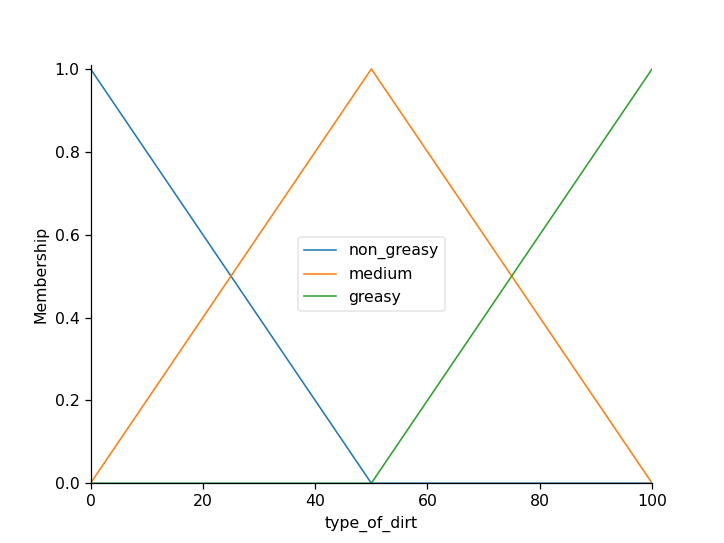

In [3]:
type_of_dirt.view()
plt.show()

<IPython.core.display.Javascript object>


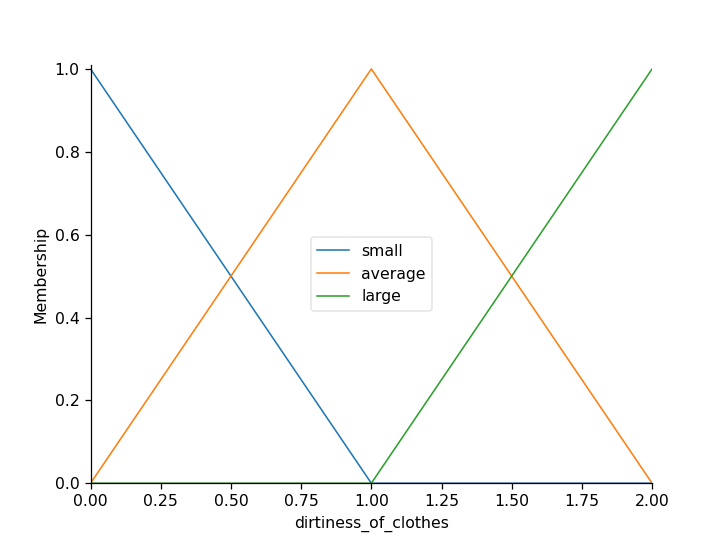

In [4]:
dirtiness_of_clothes.view()
plt.show()

<IPython.core.display.Javascript object>


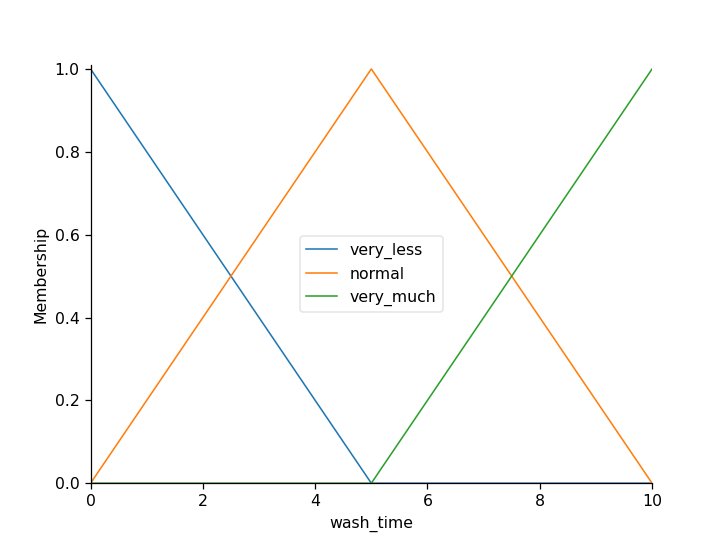

In [5]:
wash_time.view()
plt.show()

In [6]:
rule1 = ctrl.Rule(type_of_dirt['non_greasy'] & dirtiness_of_clothes['small'], wash_time['very_less'])
rule2 = ctrl.Rule(type_of_dirt['medium'], wash_time['normal'])
rule3 = ctrl.Rule(type_of_dirt['greasy'] | dirtiness_of_clothes['large'], wash_time['very_much'])

<IPython.core.display.Javascript object>


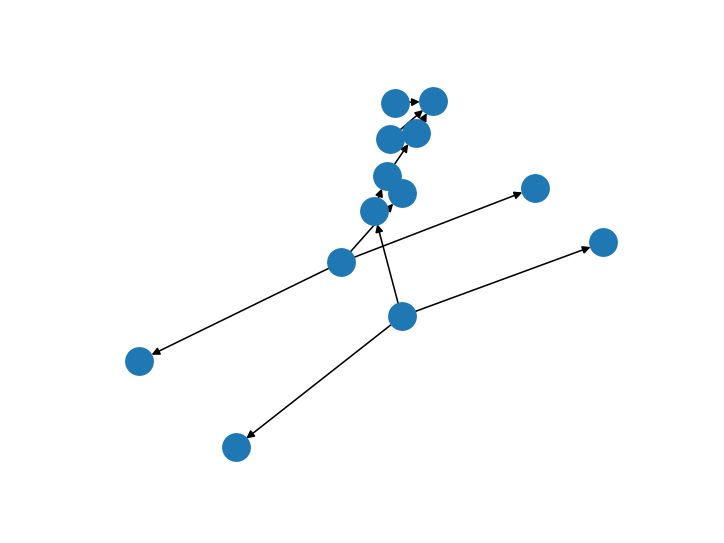

In [7]:
rule1.view()
plt.show()

<IPython.core.display.Javascript object>


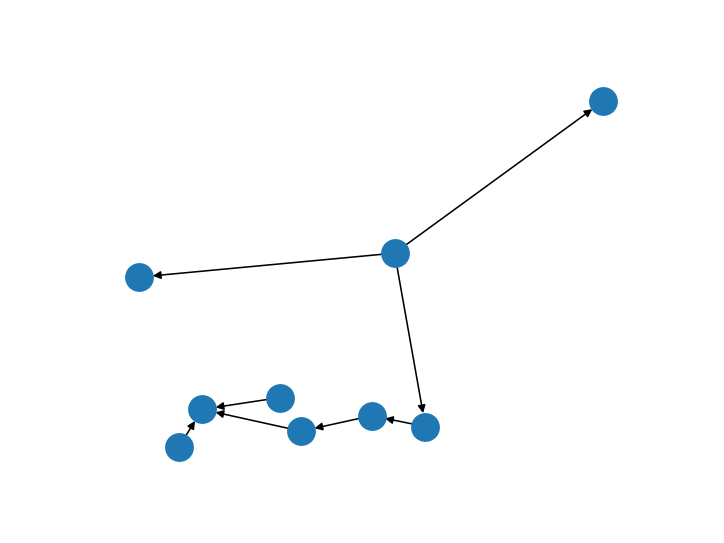

In [8]:
rule2.view()
plt.show()

<IPython.core.display.Javascript object>


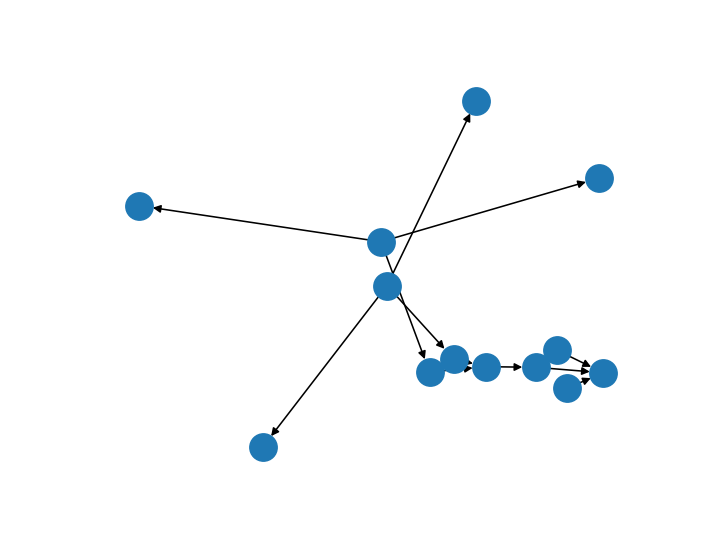

In [9]:
rule3.view()
plt.show()

In [10]:
washing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
wash = ctrl.ControlSystemSimulation(washing_ctrl)

wash.input['type_of_dirt'] = 79
wash.input['dirtiness_of_clothes'] = 0.59 

# crunch the numbers
wash.compute()

5.818502519798416


<IPython.core.display.Javascript object>


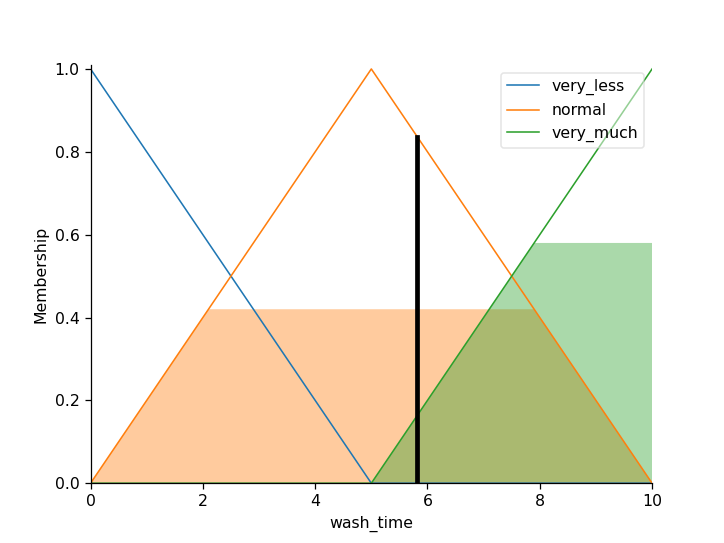

In [11]:
print(wash.output['wash_time'])
wash_time.view(sim=wash)
plt.show()